In [1]:
import pullEndogenInvestments
from CompanyWikiProfile import CompanyWikiProfile
import pprint
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
import sys
import json
import urllib.request
import pickle

# https://alpha-vantage.readthedocs.io/en/latest/

/Users/matthewsteele/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
EndogenAccountDataPull()

NameError: name 'EndogenAccountDataPull' is not defined

In [ ]:
class portfolio:
    
    def __init__(self,tickerArray):
        self.tickerArray = tickerArray
        
    def buildPortfolio():
        
    
    

In [3]:
class stockProfile(CompanyWikiProfile):
    
    #possibly integrate a twitter profile, and a finviz profile of key data
    
    def __init__(self, ticker):
        CompanyWikiProfile.__init__(self,ticker)
        self.ticker = ticker
        self.SellPrice = "notSet"
        self.BuyPrice = "notSet"
        self.Stats = "notSet"
        self.RiskScore = "notSet"
        self.zScore = "notSet"
        self.ReturnScore = "notSet"
        self.CurrentStats = {}
        self.RecentStats = {}
        self.HistoricalStats = {}
        self.CurrentPrice = "notSet"
        self.CurrentData = self.pullData('current') 
        self.RecentData = self.pullData('recent') 
        self.HistoricalData = self.pullData('historic') #load from pickle if failed

        
    def showHistoricalData(self,data):  # move this to another function 
        style.use('ggplot')
        df = data
       
        label = "4. close"
        volLabel = '5. volume'
        if "5. adjusted close" in list(df):
            label = "5. adjusted close"
            volLabel = '6. volume'

            
        df['100ma'] = df[label].rolling(window=100, min_periods=0).mean()
        
        data.index = pd.to_datetime(data.index)

        df_ohlc = df[label].resample('10D').ohlc()
        df_volume = df[volLabel].resample('10D').sum()
        df_ohlc = df_ohlc.reset_index()
        df_ohlc['date'] = df_ohlc['date'].map(mdates.date2num)
        
        ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
        ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
        ax1.plot(df.index, df[label])
        ax1.plot(df.index, df['100ma'])
        ax2.bar(df.index, df[volLabel])
        ax1.xaxis_date()
        candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')
        ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
        plt.show()
    

    def pullData(self,period):
        symbol = self.ticker
        API_KEY = "Z9MF1RI84UA8DQUP"
        symbol = self.ticker
        ts = TimeSeries(key=API_KEY, output_format='pandas', indexing_type='date')
        priceData = "null"
        
                
        def pullTodaysData(self):
            data, meta_data = ts.get_intraday(symbol=symbol,interval='15min', outputsize="full")
            self.CurrentStats = _findStats(data)
            self.CurrentPrice = self.CurrentStats["mean"]
            #self.showHistoricalData(data,"4. close")
            return data

        def pullLast4MonthsData(self):
            data, meta_data = ts.get_daily_adjusted(symbol=symbol, outputsize="compact")
            self.RecentStats = _findStats(data)
            #self.showHistoricalData(data)
            self.zScore = (self.CurrentPrice - self.RecentStats['mean'] )/self.RecentStats['std']
            return data

        def pullHistoricalData(self):
            data, meta_data = ts.get_weekly_adjusted(symbol=symbol)
            self.HistoricalStats = _findStats(data)

            return data

        def _findStats(data):
            df = data
            label = "4. close"
            if "5. adjusted close" in list(df):
                label = "5. adjusted close"
            
            std = np.std(df[label])
            max = np.max(data[label])
            min = np.min(data[label])
            mean = np.mean(df[label])
            volititility = (std - mean)/mean
            stats = {
                "std" : std,
                "mean" : mean,
                "min" : min,
                "max" : max,
                "volitility" : volititility,      
            }
            return stats
        
        if period == "current":
            priceData = pullTodaysData(self)
        elif period == "recent":
            priceData = pullLast4MonthsData(self)
        elif period == 'historic':
            priceData = pullHistoricalData(self)
                 
        return priceData
            
        

                     
    def findSellPrice(self):
        self.CurrentPrice
        
        
    

In [4]:
TSLAProfile = stockProfile("TSLA")

Tesla, Inc.
Tesla, Inc.


/Users/matthewsteele/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/matthewsteele/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


{'Type': 'Public', 'Traded\xa0as': 'NASDAQ:\xa0TSLANASDAQ-100 ComponentRussell 1000 Component', 'ISIN': 'US88160R1014', 'Industry': 'AutomotiveEnergy storage', 'Founded': 'July\xa01, 2003; 15 years ago\xa0(2003-07-01), in Delaware, U.S.[1]', 'Founders': 'Martin EberhardMarc TarpenningCo-founders:Ian Wright[i]Elon Musk[i]J. B. Straubel[i]', 'Headquarters': 'Palo Alto, California, U.S.', 'Area served': 'Worldwide', 'Key people': 'Elon Musk(Chairman & CEO)Jeffrey Brian Straubel(CTO)Deepak Ahuja(CFO)Jérôme Guillen(President, Automotive)', 'Products': 'Electric vehiclesTesla Energy', 'Production output': ' 101,312 vehicles (2017)', 'Revenue': ' US$ 11.759 billion (2017)', 'Operating income': ' US$ -1.632 billion (2017)', 'Net income': ' US$ -1.961 billion (2017)', 'Total assets': ' US$ 28.655 billion (2017)', 'Total equity': ' US$ 4.237 billion (2017)', 'Number of employees': '37,543 (2017)', 'Subsidiaries': 'SolarCityTesla Grohmann Automation', 'Website': 'Tesla.com'}


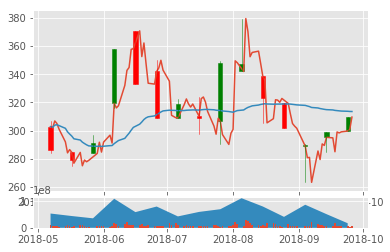

In [141]:
# data = TSLAProfile.RecentData
TSLAProfile.showHistoricalData(data)

In [150]:
TSLAProfile.HistoricalData

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount
date,,,,,,,
2010-07-09,20.0000,20.0000,14.9800,17.400,17.400,25550600.0,0.0
2010-07-16,17.9500,21.5000,16.9000,20.640,20.640,15438900.0,0.0
2010-07-23,21.3700,22.2500,19.5000,21.290,21.290,7175700.0,0.0
2010-07-30,21.5000,21.5000,19.5500,19.940,19.940,3052000.0,0.0
2010-08-06,20.5000,22.1800,19.5200,19.590,19.590,4399700.0,0.0
2010-08-13,19.9000,19.9800,17.3900,18.320,18.320,4216600.0,0.0
2010-08-20,18.4500,19.5900,18.2616,19.100,19.100,2410100.0,0.0
2010-08-27,19.0900,20.3891,18.5600,19.700,19.700,3077900.0,0.0
2010-09-03,19.7000,21.3000,19.3300,21.050,21.050,2350500.0,0.0


In [82]:
TSLAProfile.wikiProfileInfo

{'Area served': 'Worldwide',
 'Founded': 'July\xa01, 2003; 15 years ago\xa0(2003-07-01), in Delaware, U.S.[1]',
 'Founders': 'Martin EberhardMarc TarpenningCo-founders:Ian Wright[i]Elon Musk[i]J. B. Straubel[i]',
 'Headquarters': 'Palo Alto, California, U.S.',
 'ISIN': 'US88160R1014',
 'Industry': 'AutomotiveEnergy storage',
 'Key people': 'Elon Musk(Chairman & CEO)Jeffrey Brian Straubel(CTO)Deepak Ahuja(CFO)Jérôme Guillen(President, Automotive)',
 'Net income': ' US$ -1.961 billion (2017)',
 'Number of employees': '37,543 (2017)',
 'Operating income': ' US$ -1.632 billion (2017)',
 'Production output': ' 101,312 vehicles (2017)',
 'Products': 'Electric VehiclesTesla Energy',
 'Revenue': ' US$ 11.759 billion (2017)',
 'Subsidiaries': 'SolarCityTesla Grohmann Automation',
 'Total assets': ' US$ 28.655 billion (2017)',
 'Total equity': ' US$ 4.237 billion (2017)',
 'Traded\xa0as': 'NASDAQ:\xa0TSLANASDAQ-100 ComponentRussell 1000 Component',
 'Type': 'Public',
 'Website': 'Tesla.com'}

In [165]:

class AnalyzedCompany(stockProfile):
    
    def __init__(self,ticker):
        stockProfile.__init__(self,ticker)
        CurrentPrice = self.CurrentPrice
        RecentStats = self.RecentStats
        HistoricalStats = self.HistoricalStats
        zScore = self.zScore

        RiskScore = "notset"
        ProfitabilityScore = "notset"
        SellPrice = "notset"
        BuyPrice = "notset"

    def identifyRiskScore():
        print(zScore)
        CurrentPrice - RecentStats['std']

    def identifyProfitabilityScore():
        print(zScore)
        CurrentPrice - RecentStats['std']

    def setSellPrice():
        SellPrice = CurrentPrice+(HistoricalStats['std']*-zScore)
        print(SellPrice)

    def setBuyPrice():
        BuyPrice = CurrentPrice-RecentStats['std']
        print(BuyPrice)




In [154]:
TSLAAnalyzedProfile = AnalyzedCompany("TSLA")

Tesla, Inc.
Tesla, Inc.


/Users/matthewsteele/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/matthewsteele/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


{'Type': 'Public', 'Traded\xa0as': 'NASDAQ:\xa0TSLANASDAQ-100 ComponentRussell 1000 Component', 'ISIN': 'US88160R1014', 'Industry': 'AutomotiveEnergy storage', 'Founded': 'July\xa01, 2003; 15 years ago\xa0(2003-07-01), in Delaware, U.S.[1]', 'Founders': 'Martin EberhardMarc TarpenningCo-founders:Ian Wright[i]Elon Musk[i]J. B. Straubel[i]', 'Headquarters': 'Palo Alto, California, U.S.', 'Area served': 'Worldwide', 'Key people': 'Elon Musk(Chairman & CEO)Jeffrey Brian Straubel(CTO)Deepak Ahuja(CFO)Jérôme Guillen(President, Automotive)', 'Products': 'Electric VehiclesTesla Energy', 'Production output': ' 101,312 vehicles (2017)', 'Revenue': ' US$ 11.759 billion (2017)', 'Operating income': ' US$ -1.632 billion (2017)', 'Net income': ' US$ -1.961 billion (2017)', 'Total assets': ' US$ 28.655 billion (2017)', 'Total equity': ' US$ 4.237 billion (2017)', 'Number of employees': '37,543 (2017)', 'Subsidiaries': 'SolarCityTesla Grohmann Automation', 'Website': 'Tesla.com'}


275.207838177548


In [132]:
HistoricalStats

'null'

In [97]:
dir(TSLAAnalyzedProfile)

['BuyPrice',
 'CurrentData',
 'CurrentPrice',
 'CurrentStats',
 'HistoricalData',
 'HistoricalStats',
 'RecentData',
 'RecentStats',
 'ReturnScore',
 'RiskScore',
 'SellPrice',
 'Stats',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'findSellPrice',
 'name',
 'pullHistoricalData',
 'riskS',
 'searchAndFind',
 'showHistoricalData',
 'ticker',
 'wikiData',
 'wikiProfileInfo',
 'zScore']

In [49]:
data = TSLAProfile.data
data.index
print(data.head(5))
data.index = pd.to_datetime(data.index)
print(data.head(5))



            1. open  2. high  3. low  4. close  5. adjusted close   6. volume  \
date                                                                            
2010-06-29    19.00  25.0000   17.54     23.89              23.89  18766300.0   
2010-06-30    25.79  30.4192   23.30     23.83              23.83  17187100.0   
2010-07-01    25.00  25.9200   20.27     21.96              21.96   8218800.0   
2010-07-02    23.00  23.1000   18.71     19.20              19.20   5139800.0   
2010-07-06    20.00  20.0000   15.83     16.11              16.11   6866900.0   

            7. dividend amount  8. split coefficient      100ma  
date                                                             
2010-06-29                 0.0                   1.0  23.890000  
2010-06-30                 0.0                   1.0  23.860000  
2010-07-01                 0.0                   1.0  23.226667  
2010-07-02                 0.0                   1.0  22.220000  
2010-07-06                 0.0      

In [39]:
data['Weekly Adjusted Time Series']

{'2010-07-09': {'1. open': '20.0000',
  '2. high': '20.0000',
  '3. low': '14.9800',
  '4. close': '17.4000',
  '5. adjusted close': '17.4000',
  '6. volume': '25550600',
  '7. dividend amount': '0.0000'},
 '2010-07-16': {'1. open': '17.9500',
  '2. high': '21.5000',
  '3. low': '16.9000',
  '4. close': '20.6400',
  '5. adjusted close': '20.6400',
  '6. volume': '15438900',
  '7. dividend amount': '0.0000'},
 '2010-07-23': {'1. open': '21.3700',
  '2. high': '22.2500',
  '3. low': '19.5000',
  '4. close': '21.2900',
  '5. adjusted close': '21.2900',
  '6. volume': '7175700',
  '7. dividend amount': '0.0000'},
 '2010-07-30': {'1. open': '21.5000',
  '2. high': '21.5000',
  '3. low': '19.5500',
  '4. close': '19.9400',
  '5. adjusted close': '19.9400',
  '6. volume': '3052000',
  '7. dividend amount': '0.0000'},
 '2010-08-06': {'1. open': '20.5000',
  '2. high': '22.1800',
  '3. low': '19.5200',
  '4. close': '19.5900',
  '5. adjusted close': '19.5900',
  '6. volume': '4399700',
  '7. di

In [ ]:
TSLAProfile.findStats()
print(TSLAProfile.Stats)
print(TSLAProfile.CurrentPrice)

In [215]:
TSLAProfile.Stats

def findSellPrice(self):
    price = self.CurrentPrice["mean"]
    std = TSLAProfile.Stats["std"]
    zscore = TSLAProfile.Stats["zscore"]
    howMuchAbovePriceToSell = std * zscore
    





In [223]:
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt

ts = TimeSeries(key='YOUR_API_KEY', output_format='pandas')
data, meta_data = ts.get_intraday(symbol='MSFT',interval='2week', outputsize='full')
data['4. close'].plot()
plt.title('Intraday Times Series for the MSFT stock (1 min)')
plt.show()


ValueError: Invalid API call. Please retry or visit the documentation (https://www.alphavantage.co/documentation/) for TIME_SERIES_INTRADAY.

In [159]:
TSLAProfile = stockProfile("TSLA")

In [166]:
class finVizProfile:
    
    def __init__(self,ticker):
        self.ticker = ticker
    
    def 
    
    

In [109]:
df = IBMProfile.pullHistoricData()

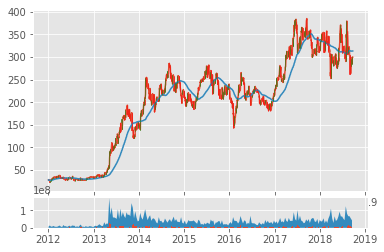

In [121]:
IBMProfile.showHistoricalData()

In [92]:
def showHistoricalData(df):
    style.use('ggplot')
#     df = self.HistoricalData
    df['100ma'] = df['Adj Close'].rolling(window=100, min_periods=0).mean()
    df_ohlc = df['Adj Close'].resample('10D').ohlc()
    df_volume = df['Volume'].resample('10D').sum()
    df_ohlc = df_ohlc.reset_index()
    df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)
    ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
    ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
    ax1.plot(df.index, df['Adj Close'])
    ax1.plot(df.index, df['100ma'])
    ax2.bar(df.index, df['Volume'])
    ax1.xaxis_date()
    candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')
    ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
    plt.show()

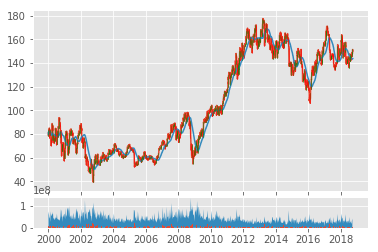

In [93]:
showHistoricalData(df)

In [115]:
df = IBMProfile.HistoricalData

In [123]:
std = np.std(df['Adj Close'])
mean = np.mean(df['Adj Close'])

In [124]:
zScore = (std - mean)/mean

In [125]:
print(zScore)

-0.4941501529534591


In [187]:
from alphavantage.price_history import (
  AdjustedPriceHistory, get_results, PriceHistory, IntradayPriceHistory,
  filter_dividends
)

# weekly prices
history = PriceHistory(period='W', output_size='compact')
results, metaData = history.get('AAPL')

KeyError: 'Meta Data'

In [1]:
import json
import urllib.request

QUERY_URL = "https://www.alphavantage.co/query?function={REQUEST_TYPE}&apikey={KEY}&symbol={SYMBOL}"
API_KEY = "Z9MF1RI84UA8DQUP"

def _request(symbol, req_type):
    with urllib.request.urlopen(QUERY_URL.format(REQUEST_TYPE=req_type, KEY=API_KEY, SYMBOL=symbol)) as req:
        data = req.read().decode("UTF-8")
    return data

def get_daily_data(symbol):
    return json.loads(_request(symbol, 'TIME_SERIES_DAILY'))

In [2]:
get_daily_data("TSLA")

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'TSLA',
  '3. Last Refreshed': '2018-09-26 10:00:36',
  '4. Output Size': 'Compact',
  '5. Time Zone': 'US/Eastern'},
 'Time Series (Daily)': {'2018-05-07': {'1. open': '297.5000',
   '2. high': '305.9588',
   '3. low': '295.1700',
   '4. close': '302.7700',
   '5. volume': '8678224'},
  '2018-05-08': {'1. open': '300.7953',
   '2. high': '307.7500',
   '3. low': '299.0000',
   '4. close': '301.9700',
   '5. volume': '5930000'},
  '2018-05-09': {'1. open': '300.4100',
   '2. high': '307.0100',
   '3. low': '300.0500',
   '4. close': '306.8500',
   '5. volume': '5727365'},
  '2018-05-10': {'1. open': '307.4997',
   '2. high': '312.9900',
   '3. low': '304.1119',
   '4. close': '305.0200',
   '5. volume': '5651561'},
  '2018-05-11': {'1. open': '307.7000',
   '2. high': '308.8800',
   '3. low': '299.0800',
   '4. close': '301.0600',
   '5. volume': '4679649'},
  '2018-05-14': {'1. open': 

In [147]:
import subprocess
import json
 
def get_value(identifier):
    get_value_url = 'http://finance.google.com/finance/info?client=ig&q=' + identifier 
    value = subprocess.Popen(['curl', '-s', get_value_url], stdout=subprocess.PIPE).communicate()[0]
    j = json.loads(value[5:len(value)-2])
    return float(j['l'])
 
if __name__ == "__main__":
    company_list = ['NSE:WIPRO','NASDAQ:AAPL'];
    for company in company_list:
        share_value = get_value(company)
        print (company + ':' + share_value)


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

Enter symbol name:TSLA
                      1. open   2. high    3. low  4. close  5. volume
date                                                                  
2018-09-19 09:30:00  281.0000  282.9800  280.7850  282.8934   269276.0
2018-09-19 09:31:00  283.3500  284.3900  283.1900  284.3900    62632.0
2018-09-19 09:32:00  284.3000  284.7400  283.4004  283.4004    63062.0
2018-09-19 09:33:00  283.5500  283.5500  282.9900  283.1200    39378.0
2018-09-19 09:34:00  283.1090  284.5133  283.1090  284.0100    37387.0
2018-09-19 09:35:00  283.8811  283.9800  283.2550  283.9800    25330.0
2018-09-19 09:36:00  284.2400  284.2400  283.6900  284.0000    20281.0
2018-09-19 09:37:00  283.7500  284.6204  283.7500  284.1700    34786.0
2018-09-19 09:38:00  284.0600  284.0600  283.3400  283.3796    36864.0
2018-09-19 09:39:00  283.8400  283.8400  283.5200  283.7525    29152.0
2018-09-19 09:40:00  283.5050  285.6900  283.5050  285.6900    68482.0
2018-09-19 09:41:00  285.6090  285.6090  284.6200  285

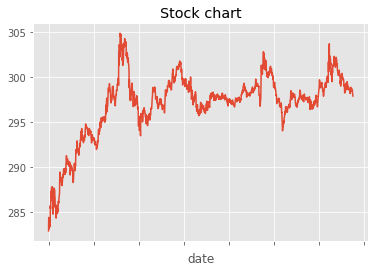

{'max': 304.88999999999999,
 'mean': 296.97093185579223,
 'min': 282.89339999999999}

In [156]:
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
import sys
 
def daily(symbol):
    ts = TimeSeries(key='your_key', output_format='pandas')
    data, meta_data = ts.get_intraday(symbol=symbol,interval='1min', outputsize='full')
    print (data)
    dayPrice = {}
    dayPrice["max"] = np.max(data['4. close'])
    dayPrice["mean"] = np.mean(data['4. close'])
    dayPrice["min"] = np.min(data['4. close'])
    data['4. close'].plot()
    plt.title('Stock chart')
    plt.show()
    return dayPrice
    
 
symbol= input("Enter symbol name:")
stockchart(symbol)

['_Stock__ticker',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'get_historical',
 'get_info',
 'get_latest_price',
 'get_ticker',
 'save_historical',
 'set_ticker']

RequestError: Unable to process the request. Check if the columns selected are valid.